In [1]:
import pandas as pd
import numpy as np
from root_numpy import root2array, root2rec, tree2array
from trainlib.config import Config
from trainlib.Preprocessor import Preprocessor
from trainlib.generator import generate_training_data, generate_validation_data
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle
from trainlib.PCAWhiteningPreprocessor import PCAWhiteningPreprocessor

Welcome to JupyROOT 6.10/09


In [2]:
H1_data_files = ["/data_CMS/cms/wind/CJLST_NTuples/VBFH125/ZZ4lAnalysis.root"]
H0_data_files = ["/data_CMS/cms/wind/CJLST_NTuples/ggH125/ZZ4lAnalysis.root"]

In [3]:
processed_columns = ["PFMET", "nCleanedJetsPt30", "nCleanedJetsPt30BTagged_bTagSF", "nExtraLep", "D_VBF2j_ggH_ME"]
cuts = lambda row: row["nCleanedJetsPt30"] >= 2
pre = PCAWhiteningPreprocessor(processed_columns = processed_columns, cuts = cuts)

In [4]:
gen = generate_training_data(H1_data_files, H0_data_files, branches = Config.branches, preprocessor = None, training_split = 0.5, as_matrix = False)

skimming /data_CMS/cms/wind/CJLST_NTuples/VBFH125/ZZ4lAnalysis.root
collection set up: 1 files, 62320 entries in total, 31160 of which will be used
skimming /data_CMS/cms/wind/CJLST_NTuples/ggH125/ZZ4lAnalysis.root
collection set up: 1 files, 110483 entries in total, 55241 of which will be used


In [5]:
pre.setup(gen, len_setupdata = 20000)

H1 contains 31160 entries
H0 contains 55241 entries
using the following chunk sizes: (31 / 55)
setting up PCA whitening on 20038 events
        PFMET  nCleanedJetsPt30  nCleanedJetsPt30BTagged_bTagSF  nExtraLep  \
8   15.601312                 3                               0          0   
12  18.929432                 3                               1          0   
0   59.007339                 2                               0          0   
7   51.649479                 2                               0          0   
5   24.156202                 2                               0          0   
37  30.757637                 2                               0          0   
30   7.469811                 2                               0          0   
47  43.646606                 2                               0          0   
1   24.724070                 2                               0          0   
3   18.563736                 2                               0          0   
42  33

In [6]:
pre.save("/home/llr/cms/wind/", "sample_pre.pkl")

In [7]:
valgen = generate_validation_data(H1_data_files, H0_data_files, branches = Config.branches, preprocessor = None, training_split = 0.5, as_matrix = False)

skimming /data_CMS/cms/wind/CJLST_NTuples/VBFH125/ZZ4lAnalysis.root
collection set up: 1 files, 62320 entries in total, 31160 of which will be used
skimming /data_CMS/cms/wind/CJLST_NTuples/ggH125/ZZ4lAnalysis.root
collection set up: 1 files, 110483 entries in total, 55242 of which will be used


In [8]:
testdata = []
testlength = 0
for data in valgen:
    testdata.append(data[0])
    testlength += len(data[0])
    if(testlength > 1000):
        break

H1 contains 31160 entries
H0 contains 55242 entries
using the following chunk sizes: (31 / 55)


In [9]:
testdata = pd.concat(testdata)

In [23]:
pre2 = PCAWhiteningPreprocessor(processed_columns = processed_columns, cuts = cuts)
pre2.load("/home/llr/cms/wind/", "sample_pre.pkl")

In [24]:
postdata = pre2.process(testdata).as_matrix()

        PFMET  nCleanedJetsPt30  nCleanedJetsPt30BTagged_bTagSF  nExtraLep  \
29  57.836193                 2                               0          0   
43  32.057751                 2                               0          0   
12  27.848513                 2                               0          0   
25  23.353706                 3                               0          0   
3   24.642523                 2                               0          0   
3   29.879141                 2                               0          0   
9   54.523544                 2                               0          0   
5   41.684734                 2                               0          0   
1   19.497768                 2                               0          0   
18  72.735649                 2                               0          0   
0   37.018997                 3                               0          0   
13  26.365494                 2                               0 

In [12]:
testdata

,PFMET,nCleanedJetsPt30,nCleanedJetsPt30BTagged_bTagSF,nExtraLep,D_VBF2j_ggH_ME
44,13.312522,0,0,0,0.466286
29,30.368071,0,0,0,0.467938
29,57.836193,2,0,0,0.007010
11,34.121082,1,0,0,0.466186
4,25.285357,0,0,0,0.466428
43,32.057751,2,0,0,0.099545
14,32.105377,0,0,0,0.467474
21,42.577930,0,0,0,0.474415
12,27.848513,2,0,0,0.832852
19,23.367134,0,0,0,0.466159


In [13]:
postframe = pre2.process(testdata)

        PFMET  nCleanedJetsPt30  nCleanedJetsPt30BTagged_bTagSF  nExtraLep  \
29  57.836193                 2                               0          0   
43  32.057751                 2                               0          0   
12  27.848513                 2                               0          0   
25  23.353706                 3                               0          0   
3   24.642523                 2                               0          0   
3   29.879141                 2                               0          0   
9   54.523544                 2                               0          0   
5   41.684734                 2                               0          0   
1   19.497768                 2                               0          0   
18  72.735649                 2                               0          0   
0   37.018997                 3                               0          0   
13  26.365494                 2                               0 

In [17]:
postframe.sort_index()

,PCA_w_0,PCA_w_1,PCA_w_2,PCA_w_3,PCA_w_4
0,0.596865,-0.493704,-0.024923,-0.210571,-0.044487
0,-1.172947,-0.470639,0.816993,-0.076306,-0.057163
0,0.031476,-0.468596,0.035767,-0.190999,-0.051669
0,-1.579392,1.245285,0.828154,-0.237205,-0.035653
0,0.124523,1.124028,1.180484,-0.236257,-0.005959
0,-1.279813,-0.440147,0.526195,-0.106453,-0.063067
0,-0.296940,-0.403070,-0.527056,-0.246599,-0.064836
1,-0.730541,-0.490675,0.774075,-0.091109,-0.051475
1,-1.207982,-0.432342,0.389397,-0.123394,-0.064096
1,1.240459,-0.568467,0.448193,-0.172138,-0.028157


In [12]:
np.mean(postdata, axis = 0)

array([ 0.13732255,  0.06829707,  0.01778643, -0.04054737,  0.03826833])

In [13]:
np.std(postdata, axis = 0)

array([ 1.05383876,  1.21147961,  1.03597695,  1.07936523,  1.29402369])

In [ ]:
# test the preprocessor in place

In [20]:
gen = generate_training_data(H1_data_files, H0_data_files, branches = Config.branches, preprocessor = pre2.process, training_split = 0.5)

skimming /data_CMS/cms/wind/CJLST_NTuples/VBFH125/ZZ4lAnalysis.root
collection set up: 1 files, 62320 entries in total, 31160 of which will be used
skimming /data_CMS/cms/wind/CJLST_NTuples/ggH125/ZZ4lAnalysis.root
collection set up: 1 files, 110483 entries in total, 55241 of which will be used


In [21]:
for data in gen:
    break

H1 contains 31160 entries
H0 contains 55241 entries
using the following chunk sizes: (31 / 55)
        PFMET  nCleanedJetsPt30  nCleanedJetsPt30BTagged_bTagSF  nExtraLep  \
0   59.007339                 2                               0          0   
1   24.724070                 2                               0          0   
2   56.168079                 3                               0          0   
3   18.563736                 2                               0          0   
4   39.436031                 2                               0          0   
5   24.156202                 2                               0          0   
7   51.649479                 2                               0          0   
8   15.601312                 3                               0          0   
12  18.929432                 3                               1          0   
16  49.163219                 2                               1          0   
17  43.544773                 3                

In [29]:
plt.hist(data[0][:,-1])

(array([ 2.,  1.,  2.,  2.,  5.,  4.,  0.,  1.,  0.,  1.]),
 array([-0.09122564, -0.08125773, -0.07128981, -0.0613219 , -0.05135399,
        -0.04138608, -0.03141816, -0.02145025, -0.01148234, -0.00151443,
         0.00845349]),
 <a list of 10 Patch objects>)

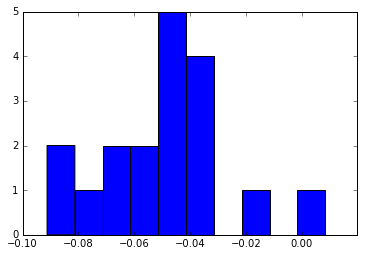

In [30]:
plt.show()

In [22]:
testframe = testdata[0]

KeyError: 0

In [16]:
testdata = testframe["D_VBF2j_ggH_ME"].as_matrix()

In [17]:
testdata

array([ 0.99504268,  0.46706593,  0.46618596,  0.46902144,  0.84091151,
        0.46627524,  0.46642828,  0.92468959,  0.46621096,  0.46738461,
        0.46631095,  0.23674536,  0.46798036,  0.46715894,  0.46627659,
        0.46892664,  0.46695751,  0.09954475,  0.4666698 ,  0.47023335,
        0.46858981,  0.60027939,  0.46653253,  0.36146647,  0.18551594,
        0.46793753,  0.46800712,  0.17918898,  0.46628559,  0.46744311,
        0.47170004,  0.46910962,  0.46784174,  0.46973145,  0.46626598,
        0.4676986 ,  0.14160934,  0.46782783,  0.46785429,  0.4668026 ,
        0.56273985,  0.84118414,  0.46644816,  0.46869797,  0.46628106,
        0.46615905,  0.46881485,  0.46732551,  0.46774507,  0.46900302,
        0.47541496,  0.46652439,  0.46619165,  0.47211418,  0.466212  ,
        0.46747392,  0.46617618,  0.00701026,  0.46874911,  0.83285171,
        0.46708894,  0.46616012,  0.61868244,  0.46627107,  0.4689098 ,
        0.46761546,  0.00522458,  0.46942413,  0.46697095,  0.46